Problem Statement
The primary objective of is project is to create a data science solution for predicting used car prices accurately by

analyzing a diverse dataset including car model, no. of owners, age, mileage, fuel type, kilometers driven, features and

location. The aim is to build a machine learning model that offers users to find current valuations for used cars.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df1 = pd.read_excel(r"C:\Users\smm\Downloads\chennai_cars.xlsx")


In [3]:
df1

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1414,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1415,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1416,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1417,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [4]:
df1["new_car_detail"]

0       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
1       {'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...
2       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
3       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
                              ...                        
1414    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1415    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1416    {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
1417    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1418    {'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...
Name: new_car_detail, Length: 1419, dtype: object

In [5]:
import ast
df1["new_car_detail"]=df1["new_car_detail"].apply(ast.literal_eval)

In [6]:
df_chennai= pd.json_normalize(df1["new_car_detail"])
df_chennai

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,8654,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,4025,7 Seater Standard BSIV,₹ 4.15 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,8135,Turbo XV Premium BSVI,₹ 7.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,1579,Sportz 1.1L,₹ 3.98 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,1341,1.2 VX i VTEC,₹ 5.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,0,Petrol,Hatchback,"42,891",Automatic,1,1st Owner,Maruti,Maruti Swift,2018,6190,AMT VXI,₹ 6.20 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1415,0,Diesel,SUV,"59,100",Manual,1,1st Owner,Renault,Renault Duster,2018,5050,85PS Diesel RxZ,₹ 8.90 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1416,0,Petrol,SUV,"55,913",Automatic,1,1st Owner,Tata,Tata Nexon,2018,6364,1.2 Revotron XZA Plus,₹ 8.01 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1417,0,Diesel,SUV,"65,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Tiguan,2017,5849,2.0 TDI Highline,₹ 20.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days


In [7]:
df_chennai.dtypes

it                       int64
ft                      object
bt                      object
km                      object
transmission            object
ownerNo                  int64
owner                   object
oem                     object
model                   object
modelYear                int64
centralVariantId         int64
variantName             object
price                   object
priceActual             object
priceSaving             object
priceFixedText          object
trendingText.imgUrl     object
trendingText.heading    object
trendingText.desc       object
dtype: object

In [8]:
df_chennai['price[₹Lakh]'] = df_chennai['price'].str.extract(r'₹ (\d+\.\d+) Lakh').astype(float)

In [9]:
df_chennai

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,price[₹Lakh]
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,8654,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,11.50
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,4025,7 Seater Standard BSIV,₹ 4.15 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,4.15
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,8135,Turbo XV Premium BSVI,₹ 7.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,7.50
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,1579,Sportz 1.1L,₹ 3.98 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,3.98
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,1341,1.2 VX i VTEC,₹ 5.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,0,Petrol,Hatchback,"42,891",Automatic,1,1st Owner,Maruti,Maruti Swift,2018,6190,AMT VXI,₹ 6.20 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,6.20
1415,0,Diesel,SUV,"59,100",Manual,1,1st Owner,Renault,Renault Duster,2018,5050,85PS Diesel RxZ,₹ 8.90 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,8.90
1416,0,Petrol,SUV,"55,913",Automatic,1,1st Owner,Tata,Tata Nexon,2018,6364,1.2 Revotron XZA Plus,₹ 8.01 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,8.01
1417,0,Diesel,SUV,"65,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Tiguan,2017,5849,2.0 TDI Highline,₹ 20.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,20.50


Drop the insignificant columns from the dataset

In [10]:
df_chennai.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText.imgUrl',
       'trendingText.heading', 'trendingText.desc', 'price[₹Lakh]'],
      dtype='object')

In [11]:
df_chennai.drop(["it","bt","owner","oem","centralVariantId","variantName","price","priceActual","priceSaving","priceFixedText","trendingText.imgUrl","trendingText.heading","trendingText.desc"],axis=1,inplace=True)

In [12]:
df_chennai.head(25)

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Petrol,"20,000",Automatic,1,Kia Sonet,2022,11.50
1,Petrol,"20,687",Manual,1,Maruti Eeco,2015,4.15
2,Petrol,"30,000",Manual,1,Nissan Magnite,2021,7.50
3,Petrol,"59,247",Manual,1,Hyundai i10,2015,3.98
4,Petrol,"50,000",Manual,1,Honda Jazz,2015,5.50
5,Diesel,"20,000",Automatic,1,Mercedes-Benz E-Class,2016,NaN
6,Petrol,"29,403",Automatic,1,Maruti Celerio,2016,4.53
7,Petrol,"42,700",Manual,1,Maruti A-Star,2010,2.85
8,Diesel,"23,001",Automatic,1,BMW X3,2018,NaN
9,Petrol,"25,925",Automatic,2,Ford Ecosport,2018,8.21


Checking Null Values And Duplicate Values

In [13]:
df_chennai.isnull().sum()

ft                0
km                0
transmission      0
ownerNo           0
model             0
modelYear         0
price[₹Lakh]    208
dtype: int64

In [14]:
df_chennai.dropna(inplace=True)

In [15]:
df_chennai.isnull().sum()

ft              0
km              0
transmission    0
ownerNo         0
model           0
modelYear       0
price[₹Lakh]    0
dtype: int64

In [16]:
df_chennai.duplicated().sum()

21

In [17]:
df_chennai.drop_duplicates(inplace=True)

In [18]:
df_chennai.duplicated().sum()

0

In [19]:
df_chennai['km'] = df_chennai['km'].astype(str).str.replace(',', '').astype(float)


In [20]:
print(df_chennai.dtypes)


ft               object
km              float64
transmission     object
ownerNo           int64
model            object
modelYear         int64
price[₹Lakh]    float64
dtype: object


In [21]:
df_chennai

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Petrol,20000.0,Automatic,1,Kia Sonet,2022,11.50
1,Petrol,20687.0,Manual,1,Maruti Eeco,2015,4.15
2,Petrol,30000.0,Manual,1,Nissan Magnite,2021,7.50
3,Petrol,59247.0,Manual,1,Hyundai i10,2015,3.98
4,Petrol,50000.0,Manual,1,Honda Jazz,2015,5.50
...,...,...,...,...,...,...,...
1413,Diesel,96094.0,Manual,4,Ford Figo,2010,1.20
1415,Diesel,59100.0,Manual,1,Renault Duster,2018,8.90
1416,Petrol,55913.0,Automatic,1,Tata Nexon,2018,8.01
1417,Diesel,65000.0,Automatic,1,Volkswagen Tiguan,2017,20.50


In [22]:
df2=pd.read_excel(r"C:\Users\smm\Downloads\bangalore_cars.xlsx")

In [23]:
df2

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [24]:
df2["new_car_detail"]

0       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
2       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
3       {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
4       {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
                              ...                        
1476    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1477    {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1478    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1479    {'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...
1480    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
Name: new_car_detail, Length: 1481, dtype: object

In [25]:
df2["new_car_detail"]=df2["new_car_detail"].apply(ast.literal_eval)

In [26]:
df_bangalore= pd.json_normalize(df2["new_car_detail"])
df_bangalore

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,0,Diesel,SUV,"1,56,039",Manual,2,2nd Owner,Toyota,Toyota Fortuner,2012,2253,4x4 MT,₹ 16.49 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1477,0,Petrol,Sedan,"56,000",Manual,2,2nd Owner,Maruti,Maruti SX4,2008,4257,Zxi BSIII,₹ 3.30 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1478,0,Petrol,Hatchback,"42,000",Manual,2,2nd Owner,Honda,Honda Brio,2014,1188,S MT,₹ 4.25 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1479,0,Diesel,Hatchback,"93,003",Manual,1,1st Owner,Hyundai,Hyundai i20,2018,5695,1.4 Asta Dual Tone,₹ 7.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days


In [27]:
df_bangalore['price[₹Lakh]'] = df_bangalore['price'].str.extract(r'₹ (\d+\.\d+) Lakh').astype(float)

In [28]:
df_bangalore

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,price[₹Lakh]
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,8.11
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,5.85
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,4.62
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,0,Diesel,SUV,"1,56,039",Manual,2,2nd Owner,Toyota,Toyota Fortuner,2012,2253,4x4 MT,₹ 16.49 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,16.49
1477,0,Petrol,Sedan,"56,000",Manual,2,2nd Owner,Maruti,Maruti SX4,2008,4257,Zxi BSIII,₹ 3.30 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,3.30
1478,0,Petrol,Hatchback,"42,000",Manual,2,2nd Owner,Honda,Honda Brio,2014,1188,S MT,₹ 4.25 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,4.25
1479,0,Diesel,Hatchback,"93,003",Manual,1,1st Owner,Hyundai,Hyundai i20,2018,5695,1.4 Asta Dual Tone,₹ 7.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,7.50


In [29]:
df_bangalore.drop(["it","bt","owner","oem","centralVariantId","variantName","price","priceActual","priceSaving","priceFixedText","trendingText.imgUrl","trendingText.heading","trendingText.desc"],axis=1,inplace=True)

In [30]:
df_bangalore.head(25)

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Petrol,"1,20,000",Manual,3,Maruti Celerio,2015,NaN
1,Petrol,"32,706",Manual,2,Ford Ecosport,2018,8.11
2,Petrol,"11,949",Manual,1,Tata Tiago,2018,5.85
3,Petrol,"17,794",Manual,1,Hyundai Xcent,2014,4.62
4,Diesel,"60,000",Manual,1,Maruti SX4 S Cross,2015,7.90
5,Diesel,"20,000",Manual,1,Jeep Compass,2020,NaN
6,Petrol,"37,772",Manual,1,Datsun GO,2017,3.45
7,Petrol,"30,000",Automatic,1,Hyundai Venue,2021,NaN
8,Petrol,"37,000",Automatic,1,Maruti Ciaz,2018,9.60
9,Petrol,"11,949",Manual,1,Tata Tiago,2017,5.85


In [31]:
df_bangalore['km'] =df_bangalore['km'].str.replace(',', '').astype(float)

In [32]:
df_bangalore.dtypes

ft               object
km              float64
transmission     object
ownerNo           int64
model            object
modelYear         int64
price[₹Lakh]    float64
dtype: object

In [33]:
df_bangalore.isnull().sum()

ft                0
km                0
transmission      0
ownerNo           0
model             0
modelYear         0
price[₹Lakh]    200
dtype: int64

In [34]:
df_bangalore.dropna(inplace=True)

In [35]:
df_bangalore.isnull().sum()

ft              0
km              0
transmission    0
ownerNo         0
model           0
modelYear       0
price[₹Lakh]    0
dtype: int64

In [36]:
df_bangalore.duplicated().sum()

13

In [37]:
df_bangalore.drop_duplicates(inplace=True)

In [38]:
df_bangalore.duplicated().sum()

0

In [39]:
df_bangalore

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
1,Petrol,32706.0,Manual,2,Ford Ecosport,2018,8.11
2,Petrol,11949.0,Manual,1,Tata Tiago,2018,5.85
3,Petrol,17794.0,Manual,1,Hyundai Xcent,2014,4.62
4,Diesel,60000.0,Manual,1,Maruti SX4 S Cross,2015,7.90
6,Petrol,37772.0,Manual,1,Datsun GO,2017,3.45
...,...,...,...,...,...,...,...
1476,Diesel,156039.0,Manual,2,Toyota Fortuner,2012,16.49
1477,Petrol,56000.0,Manual,2,Maruti SX4,2008,3.30
1478,Petrol,42000.0,Manual,2,Honda Brio,2014,4.25
1479,Diesel,93003.0,Manual,1,Hyundai i20,2018,7.50


In [40]:
df3=pd.read_excel(r"C:\Users\smm\Downloads\delhi_cars.xlsx")

In [41]:
df3

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1481,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1482,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1483,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [42]:
df3["new_car_detail"]

0       {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
2       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
3       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
                              ...                        
1480    {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1481    {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
1482    {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1483    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1484    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
Name: new_car_detail, Length: 1485, dtype: object

In [43]:
df3["new_car_detail"]=df3["new_car_detail"].apply(ast.literal_eval)

In [44]:
df_delhi=pd.json_normalize(df3["new_car_detail"])
df_delhi

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,7121,GTX Plus Diesel AT,₹ 19 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1,0,Petrol,SUV,"57,437",Manual,2,2nd Owner,Hyundai,Hyundai Creta,2016,1449,1.6 VTVT S,₹ 7.62 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
2,0,Petrol,SUV,"8,000",Automatic,1,1st Owner,Mercedes-Benz,Mercedes-Benz GLC,2020,6837,200,₹ 56 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
3,0,Petrol,Hatchback,"28,151",Manual,2,2nd Owner,Maruti,Maruti Swift,2018,10403,VXI,₹ 5.23 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
4,0,Petrol,SUV,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2017,5362,1.6 VTVT E Plus,₹ 7.65 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,Petrol,Sedan,"60,000",Automatic,1,1st Owner,Honda,Honda City,2019,5627,i-VTEC CVT V,₹ 9 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1481,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,₹ 9.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1482,0,Petrol,Sedan,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,₹ 4.18 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1483,0,Diesel,SUV,"38,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,₹ 11.95 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days


In [45]:
df_delhi['price[₹Lakh]'] = df_delhi['price'].str.extract(r'₹ (\d+\.\d+) Lakh').astype(float)

In [46]:
df_delhi

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,price[₹Lakh]
0,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,7121,GTX Plus Diesel AT,₹ 19 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,NaN
1,0,Petrol,SUV,"57,437",Manual,2,2nd Owner,Hyundai,Hyundai Creta,2016,1449,1.6 VTVT S,₹ 7.62 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,7.62
2,0,Petrol,SUV,"8,000",Automatic,1,1st Owner,Mercedes-Benz,Mercedes-Benz GLC,2020,6837,200,₹ 56 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,NaN
3,0,Petrol,Hatchback,"28,151",Manual,2,2nd Owner,Maruti,Maruti Swift,2018,10403,VXI,₹ 5.23 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,5.23
4,0,Petrol,SUV,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2017,5362,1.6 VTVT E Plus,₹ 7.65 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,7.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,Petrol,Sedan,"60,000",Automatic,1,1st Owner,Honda,Honda City,2019,5627,i-VTEC CVT V,₹ 9 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,NaN
1481,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,₹ 9.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,9.50
1482,0,Petrol,Sedan,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,₹ 4.18 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,4.18
1483,0,Diesel,SUV,"38,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,₹ 11.95 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,11.95


In [47]:
df_delhi.drop(["it","bt","owner","oem","centralVariantId","variantName","price","priceActual","priceSaving","priceFixedText","trendingText.imgUrl","trendingText.heading","trendingText.desc"],axis=1,inplace=True)

In [48]:
df_delhi

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Diesel,"10,000",Automatic,1,Kia Seltos,2022,NaN
1,Petrol,"57,437",Manual,2,Hyundai Creta,2016,7.62
2,Petrol,"8,000",Automatic,1,Mercedes-Benz GLC,2020,NaN
3,Petrol,"28,151",Manual,2,Maruti Swift,2018,5.23
4,Petrol,"60,000",Manual,1,Hyundai Creta,2017,7.65
...,...,...,...,...,...,...,...
1480,Petrol,"60,000",Automatic,1,Honda City,2019,NaN
1481,Petrol,"20,000",Manual,1,Kia Sonet,2021,9.50
1482,Petrol,"60,000",Manual,1,Hyundai Verna,2011,4.18
1483,Diesel,"38,000",Manual,1,Hyundai Creta,2019,11.95


In [49]:
df_delhi['km'] =df_delhi['km'].str.replace(',', '').astype(float)

In [50]:
df_delhi.dtypes

ft               object
km              float64
transmission     object
ownerNo           int64
model            object
modelYear         int64
price[₹Lakh]    float64
dtype: object

In [51]:
df_delhi.isnull().sum()

ft                0
km                0
transmission      0
ownerNo           0
model             0
modelYear         0
price[₹Lakh]    245
dtype: int64

In [52]:
df_delhi.dropna(inplace=True)

In [53]:
df_delhi.isnull().sum()

ft              0
km              0
transmission    0
ownerNo         0
model           0
modelYear       0
price[₹Lakh]    0
dtype: int64

In [54]:
df_delhi.duplicated().sum()

10

In [55]:
df_delhi.drop_duplicates(inplace=True)

In [56]:
df_delhi.duplicated().sum()

0

In [57]:
df_delhi

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
1,Petrol,57437.0,Manual,2,Hyundai Creta,2016,7.62
3,Petrol,28151.0,Manual,2,Maruti Swift,2018,5.23
4,Petrol,60000.0,Manual,1,Hyundai Creta,2017,7.65
5,Petrol,20000.0,Manual,1,Kia Sonet,2021,8.95
6,Cng,42682.0,Manual,1,Hyundai Aura,2021,7.08
...,...,...,...,...,...,...,...
1479,Diesel,71000.0,Manual,1,Mahindra Scorpio,2016,8.40
1481,Petrol,20000.0,Manual,1,Kia Sonet,2021,9.50
1482,Petrol,60000.0,Manual,1,Hyundai Verna,2011,4.18
1483,Diesel,38000.0,Manual,1,Hyundai Creta,2019,11.95


In [58]:
df4=pd.read_excel(r"C:\Users\smm\Downloads\hyderabad_cars.xlsx")

In [59]:
df4

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1478,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1480,"{'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1481,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [60]:
df4["new_car_detail"]

0       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
2       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
3       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
                              ...                        
1478    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1479    {'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...
1480    {'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...
1481    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1482    {'it': 0, 'ft': 'Diesel', 'bt': 'MUV', 'km': '...
Name: new_car_detail, Length: 1483, dtype: object

In [61]:
df4["new_car_detail"]=df4["new_car_detail"].apply(ast.literal_eval)

In [62]:
df_hydrabad=pd.json_normalize(df4["new_car_detail"])
df_hydrabad

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,7746,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1,0,Petrol,Hatchback,"85,582",Manual,2,2nd Owner,Hyundai,Hyundai EON,2014,1502,Era Plus,₹ 2.60 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
2,0,Petrol,SUV,"10,000",Manual,1,1st Owner,Hyundai,Hyundai Venue,2023,9153,S BSVI,₹ 9.55 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
3,0,Petrol,Hatchback,"50,750",Manual,1,1st Owner,Maruti,Maruti Baleno,2017,3970,1.2 Alpha,₹ 6.71 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
4,0,Petrol,SUV,"10,000",Automatic,1,1st Owner,Mahindra,Mahindra Thar,2022,8074,LX 4-Str Hard Top AT BSVI,₹ 19 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Mahindra,Mahindra XUV500,2013,3823,W8 2WD,₹ 7 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1479,0,Diesel,Sedan,"50,000",Automatic,1,1st Owner,Jaguar,Jaguar XF,2014,5007,3.0 Litre S Premium Luxury,₹ 20 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1480,0,Diesel,Sedan,"1,20,000",Automatic,3,3rd Owner,BMW,BMW 5 Series,2018,250,520d Luxury Line,₹ 35 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1481,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Tata,Tata Nexon,2019,6500,1.5 Revotorq XMA,₹ 8.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days


In [63]:
df_hydrabad['price[₹Lakh]'] = df_hydrabad['price'].str.extract(r'₹ (\d+\.\d+) Lakh').astype(float)

In [64]:
df_hydrabad

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,price[₹Lakh]
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,7746,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,10.44
1,0,Petrol,Hatchback,"85,582",Manual,2,2nd Owner,Hyundai,Hyundai EON,2014,1502,Era Plus,₹ 2.60 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,2.60
2,0,Petrol,SUV,"10,000",Manual,1,1st Owner,Hyundai,Hyundai Venue,2023,9153,S BSVI,₹ 9.55 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,9.55
3,0,Petrol,Hatchback,"50,750",Manual,1,1st Owner,Maruti,Maruti Baleno,2017,3970,1.2 Alpha,₹ 6.71 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,6.71
4,0,Petrol,SUV,"10,000",Automatic,1,1st Owner,Mahindra,Mahindra Thar,2022,8074,LX 4-Str Hard Top AT BSVI,₹ 19 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Mahindra,Mahindra XUV500,2013,3823,W8 2WD,₹ 7 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,NaN
1479,0,Diesel,Sedan,"50,000",Automatic,1,1st Owner,Jaguar,Jaguar XF,2014,5007,3.0 Litre S Premium Luxury,₹ 20 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,NaN
1480,0,Diesel,Sedan,"1,20,000",Automatic,3,3rd Owner,BMW,BMW 5 Series,2018,250,520d Luxury Line,₹ 35 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,NaN
1481,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Tata,Tata Nexon,2019,6500,1.5 Revotorq XMA,₹ 8.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,8.50


In [65]:
df_hydrabad.drop(["it","bt","owner","oem","centralVariantId","variantName","price","priceActual","priceSaving","priceFixedText","trendingText.imgUrl","trendingText.heading","trendingText.desc"],axis=1,inplace=True)

In [66]:
df_hydrabad

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Petrol,"20,000",Automatic,1,Volkswagen Polo,2022,10.44
1,Petrol,"85,582",Manual,2,Hyundai EON,2014,2.60
2,Petrol,"10,000",Manual,1,Hyundai Venue,2023,9.55
3,Petrol,"50,750",Manual,1,Maruti Baleno,2017,6.71
4,Petrol,"10,000",Automatic,1,Mahindra Thar,2022,NaN
...,...,...,...,...,...,...,...
1478,Diesel,"60,000",Manual,1,Mahindra XUV500,2013,NaN
1479,Diesel,"50,000",Automatic,1,Jaguar XF,2014,NaN
1480,Diesel,"1,20,000",Automatic,3,BMW 5 Series,2018,NaN
1481,Diesel,"50,000",Automatic,2,Tata Nexon,2019,8.50


In [67]:
df_hydrabad['km'] =df_hydrabad['km'].str.replace(',', '').astype(float)

In [68]:
df_hydrabad.dtypes

ft               object
km              float64
transmission     object
ownerNo           int64
model            object
modelYear         int64
price[₹Lakh]    float64
dtype: object

In [69]:
df_hydrabad.isnull().sum()

ft                0
km                0
transmission      0
ownerNo           0
model             0
modelYear         0
price[₹Lakh]    216
dtype: int64

In [70]:
df_hydrabad.dropna(inplace=True)

In [71]:
df_hydrabad.duplicated().sum()

13

In [72]:
df_hydrabad.drop_duplicates(inplace=True)

In [73]:
df_hydrabad.duplicated().sum()

0

In [74]:
df_hydrabad

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Petrol,20000.0,Automatic,1,Volkswagen Polo,2022,10.44
1,Petrol,85582.0,Manual,2,Hyundai EON,2014,2.60
2,Petrol,10000.0,Manual,1,Hyundai Venue,2023,9.55
3,Petrol,50750.0,Manual,1,Maruti Baleno,2017,6.71
5,Petrol,10000.0,Manual,1,Kia Sonet,2021,11.78
...,...,...,...,...,...,...,...
1472,Diesel,88178.0,Manual,1,Hyundai Verna,2020,13.21
1473,Diesel,70000.0,Manual,2,Maruti Ertiga,2013,6.50
1474,Petrol,16925.0,Manual,1,Honda Amaze,2021,7.06
1475,Petrol,12000.0,Manual,1,Maruti Alto 800,2013,2.45


In [75]:
df5=pd.read_excel(r"C:\Users\smm\Downloads\kolkata_cars.xlsx")

In [76]:
df5

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1376,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1377,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1378,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1379,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [77]:
df5["new_car_detail"]

0       {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
2       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
3       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4       {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
                              ...                        
1376    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1377    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1378    {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1379    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1380    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
Name: new_car_detail, Length: 1381, dtype: object

In [78]:
df5["new_car_detail"]=df5["new_car_detail"].apply(ast.literal_eval)

In [79]:
df_kolkata=pd.json_normalize(df5["new_car_detail"])
df_kolkata

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,2123,Hybrid,₹ 9.75 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,5236,T Option,₹ 2.66 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
2,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,8352,RXT AMT,₹ 5.95 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
3,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,1642,1.2 Sportz,₹ 2.23 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
4,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,99,35 TDI Quattro Premium,₹ 12 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1377,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1378,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1379,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days


In [80]:
df_kolkata['price[₹Lakh]'] = df_kolkata['price'].str.extract(r'₹ (\d+\.\d+) Lakh').astype(float)

In [81]:
df_kolkata

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,price[₹Lakh]
0,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,2123,Hybrid,₹ 9.75 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,9.75
1,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,5236,T Option,₹ 2.66 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,2.66
2,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,8352,RXT AMT,₹ 5.95 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,5.95
3,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,1642,1.2 Sportz,₹ 2.23 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,2.23
4,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,99,35 TDI Quattro Premium,₹ 12 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,5.10
1377,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,1.80
1378,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,5.50
1379,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,1.40


In [82]:
df_kolkata.drop(["it","bt","owner","oem","centralVariantId","variantName","price","priceActual","priceSaving","priceFixedText","trendingText.imgUrl","trendingText.heading","trendingText.desc"],axis=1,inplace=True)

In [83]:
df_kolkata

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Petrol,"70,000",Automatic,3,Toyota Camry,2014,9.75
1,Petrol,"23,981",Manual,1,Datsun RediGO,2017,2.66
2,Petrol,"7,100",Automatic,1,Renault Kiger,2021,5.95
3,Petrol,"71,574",Manual,2,Hyundai i20,2011,2.23
4,Diesel,"50,000",Automatic,2,Audi Q3,2014,NaN
...,...,...,...,...,...,...,...
1376,Petrol,"10,000",Manual,1,Maruti Celerio,2022,5.10
1377,Petrol,"1,20,000",Manual,1,Maruti Alto 800,2014,1.80
1378,Petrol,"50,000",Automatic,3,Mercedes-Benz C-Class,2011,5.50
1379,Petrol,"40,000",Manual,1,Maruti Ritz,2012,1.40


In [84]:
df_kolkata['km'] =df_kolkata['km'].str.replace(',', '').astype(float)

In [85]:
df_kolkata.dtypes

ft               object
km              float64
transmission     object
ownerNo           int64
model            object
modelYear         int64
price[₹Lakh]    float64
dtype: object

In [86]:
df_kolkata.isnull().sum()

ft                0
km                0
transmission      0
ownerNo           0
model             0
modelYear         0
price[₹Lakh]    212
dtype: int64

In [87]:
df_kolkata.dropna(inplace=True)

In [88]:
df_kolkata.duplicated().sum()

23

In [89]:
df_kolkata.drop_duplicates(inplace=True)

In [90]:
df_kolkata.duplicated().sum()

0

In [91]:
df_kolkata

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Petrol,70000.0,Automatic,3,Toyota Camry,2014,9.75
1,Petrol,23981.0,Manual,1,Datsun RediGO,2017,2.66
2,Petrol,7100.0,Automatic,1,Renault Kiger,2021,5.95
3,Petrol,71574.0,Manual,2,Hyundai i20,2011,2.23
5,Petrol,35629.0,Automatic,1,Maruti Wagon R,2018,4.25
...,...,...,...,...,...,...,...
1375,Petrol,30000.0,Manual,1,Hyundai Santro Xing,2009,1.50
1376,Petrol,10000.0,Manual,1,Maruti Celerio,2022,5.10
1377,Petrol,120000.0,Manual,1,Maruti Alto 800,2014,1.80
1378,Petrol,50000.0,Automatic,3,Mercedes-Benz C-Class,2011,5.50


In [92]:
df6=pd.read_excel(r"C:\Users\smm\Downloads\jaipur_cars.xlsx")

In [93]:
df6

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1115,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1116,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1117,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1118,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [94]:
df6["new_car_detail"]

0       {'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...
1       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
2       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
3       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
                              ...                        
1115    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1116    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1117    {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
1118    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1119    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
Name: new_car_detail, Length: 1120, dtype: object

In [95]:
df6["new_car_detail"]=df6["new_car_detail"].apply(ast.literal_eval)

In [96]:
df_jaipur=pd.json_normalize(df6["new_car_detail"])
df_jaipur

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,1487,Asta 1.4 CRDi,₹ 5.10 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,10403,VXI,₹ 3.81 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,3982,VXI AT,₹ 3.20 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,5602,1.2 Kappa Magna BSIV,₹ 4.20 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,4319,AMT VXI,₹ 3.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Chevrolet,Chevrolet Beat,2011,438,LT,₹ 1.08 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1116,0,Petrol,Hatchback,"70,000",Manual,1,1st Owner,Maruti,Maruti Alto,2007,3917,STD,₹ 1.05 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1117,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Renault,Renault Kiger,2022,8350,RXZ,₹ 8.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days
1118,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Alto,2009,3904,Std,₹ 1 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days


In [97]:
df_jaipur['price[₹Lakh]'] = df_jaipur['price'].str.extract(r'₹ (\d+\.\d+) Lakh').astype(float)

In [98]:
df_jaipur

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,price[₹Lakh]
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,1487,Asta 1.4 CRDi,₹ 5.10 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,5.10
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,10403,VXI,₹ 3.81 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,3.81
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,3982,VXI AT,₹ 3.20 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,3.20
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,5602,1.2 Kappa Magna BSIV,₹ 4.20 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,4.20
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,4319,AMT VXI,₹ 3.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Chevrolet,Chevrolet Beat,2011,438,LT,₹ 1.08 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,1.08
1116,0,Petrol,Hatchback,"70,000",Manual,1,1st Owner,Maruti,Maruti Alto,2007,3917,STD,₹ 1.05 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,1.05
1117,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Renault,Renault Kiger,2022,8350,RXZ,₹ 8.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,8.50
1118,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Alto,2009,3904,Std,₹ 1 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,NaN


In [99]:
df_jaipur.drop(["it","bt","owner","oem","centralVariantId","variantName","price","priceActual","priceSaving","priceFixedText","trendingText.imgUrl","trendingText.heading","trendingText.desc"],axis=1,inplace=True)

In [100]:
df_jaipur

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Diesel,"1,20,000",Manual,2,Hyundai i20,2015,5.10
1,Petrol,"66,951",Manual,1,Maruti Swift,2012,3.81
2,Petrol,"80,000",Automatic,2,Maruti Celerio,2016,3.20
3,Petrol,"44,392",Manual,1,Hyundai Grand i10,2017,4.20
4,Petrol,"40,000",Automatic,1,Maruti Wagon R,2016,3.50
...,...,...,...,...,...,...,...
1115,Petrol,"1,20,000",Manual,1,Chevrolet Beat,2011,1.08
1116,Petrol,"70,000",Manual,1,Maruti Alto,2007,1.05
1117,Petrol,"20,000",Manual,1,Renault Kiger,2022,8.50
1118,Petrol,"40,000",Manual,1,Maruti Alto,2009,NaN


In [101]:
df_jaipur['km'] =df_jaipur['km'].str.replace(',', '').astype(float)

In [102]:
df_jaipur.dtypes

ft               object
km              float64
transmission     object
ownerNo           int64
model            object
modelYear         int64
price[₹Lakh]    float64
dtype: object

In [103]:
df_jaipur.isnull().sum()

ft                0
km                0
transmission      0
ownerNo           0
model             0
modelYear         0
price[₹Lakh]    297
dtype: int64

In [104]:
df_jaipur.dropna(inplace=True)

In [105]:
df_jaipur.isnull().sum()

ft              0
km              0
transmission    0
ownerNo         0
model           0
modelYear       0
price[₹Lakh]    0
dtype: int64

In [106]:
df_jaipur.duplicated().sum()

23

In [107]:
df_jaipur.drop_duplicates(inplace=True)

In [108]:
df_jaipur.duplicated().sum()

0

In [109]:
df_jaipur

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Diesel,120000.0,Manual,2,Hyundai i20,2015,5.10
1,Petrol,66951.0,Manual,1,Maruti Swift,2012,3.81
2,Petrol,80000.0,Automatic,2,Maruti Celerio,2016,3.20
3,Petrol,44392.0,Manual,1,Hyundai Grand i10,2017,4.20
4,Petrol,40000.0,Automatic,1,Maruti Wagon R,2016,3.50
...,...,...,...,...,...,...,...
1111,Petrol,150000.0,Manual,1,Hyundai EON,2014,1.60
1114,Diesel,100000.0,Manual,1,Ford Ecosport,2014,3.50
1115,Petrol,120000.0,Manual,1,Chevrolet Beat,2011,1.08
1116,Petrol,70000.0,Manual,1,Maruti Alto,2007,1.05


In [110]:
df7=pd.concat([df_chennai,df_bangalore,df_delhi,df_hydrabad,df_kolkata,df_jaipur])

In [111]:
df7

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Petrol,20000.0,Automatic,1,Kia Sonet,2022,11.50
1,Petrol,20687.0,Manual,1,Maruti Eeco,2015,4.15
2,Petrol,30000.0,Manual,1,Nissan Magnite,2021,7.50
3,Petrol,59247.0,Manual,1,Hyundai i10,2015,3.98
4,Petrol,50000.0,Manual,1,Honda Jazz,2015,5.50
...,...,...,...,...,...,...,...
1111,Petrol,150000.0,Manual,1,Hyundai EON,2014,1.60
1114,Diesel,100000.0,Manual,1,Ford Ecosport,2014,3.50
1115,Petrol,120000.0,Manual,1,Chevrolet Beat,2011,1.08
1116,Petrol,70000.0,Manual,1,Maruti Alto,2007,1.05


In [112]:
df7.to_csv(r"C:\Users\smm\Documents\cardekho\cardekho.csv")

In [113]:
df=pd.read_csv(r"C:\Users\smm\Documents\cardekho\cardekho.csv")

In [114]:
df

,Unnamed: 0,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,0,Petrol,20000.0,Automatic,1,Kia Sonet,2022,11.50
1,1,Petrol,20687.0,Manual,1,Maruti Eeco,2015,4.15
2,2,Petrol,30000.0,Manual,1,Nissan Magnite,2021,7.50
3,3,Petrol,59247.0,Manual,1,Hyundai i10,2015,3.98
4,4,Petrol,50000.0,Manual,1,Honda Jazz,2015,5.50
...,...,...,...,...,...,...,...,...
6883,1111,Petrol,150000.0,Manual,1,Hyundai EON,2014,1.60
6884,1114,Diesel,100000.0,Manual,1,Ford Ecosport,2014,3.50
6885,1115,Petrol,120000.0,Manual,1,Chevrolet Beat,2011,1.08
6886,1116,Petrol,70000.0,Manual,1,Maruti Alto,2007,1.05


In [115]:
df.dtypes

Unnamed: 0        int64
ft               object
km              float64
transmission     object
ownerNo           int64
model            object
modelYear         int64
price[₹Lakh]    float64
dtype: object

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6888 entries, 0 to 6887
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6888 non-null   int64  
 1   ft            6888 non-null   object 
 2   km            6888 non-null   float64
 3   transmission  6888 non-null   object 
 4   ownerNo       6888 non-null   int64  
 5   model         6888 non-null   object 
 6   modelYear     6888 non-null   int64  
 7   price[₹Lakh]  6888 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 430.6+ KB


In [117]:
df.isnull().sum()

Unnamed: 0      0
ft              0
km              0
transmission    0
ownerNo         0
model           0
modelYear       0
price[₹Lakh]    0
dtype: int64

In [118]:
df.duplicated().sum()

0

In [119]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [120]:
df

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Petrol,20000.0,Automatic,1,Kia Sonet,2022,11.50
1,Petrol,20687.0,Manual,1,Maruti Eeco,2015,4.15
2,Petrol,30000.0,Manual,1,Nissan Magnite,2021,7.50
3,Petrol,59247.0,Manual,1,Hyundai i10,2015,3.98
4,Petrol,50000.0,Manual,1,Honda Jazz,2015,5.50
...,...,...,...,...,...,...,...
6883,Petrol,150000.0,Manual,1,Hyundai EON,2014,1.60
6884,Diesel,100000.0,Manual,1,Ford Ecosport,2014,3.50
6885,Petrol,120000.0,Manual,1,Chevrolet Beat,2011,1.08
6886,Petrol,70000.0,Manual,1,Maruti Alto,2007,1.05


Explore the catagorical Features

In [121]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtype=='object')&(feature not in ['y']))]
categorical_features

['ft', 'transmission', 'model']

In [122]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


ft
['Petrol' 'Diesel' 'Cng' 'Lpg' 'Electric']

transmission
['Automatic' 'Manual']

model
['Kia Sonet' 'Maruti Eeco' 'Nissan Magnite' 'Hyundai i10' 'Honda Jazz'
 'Maruti Celerio' 'Maruti A-Star' 'Ford Ecosport' 'Hyundai i20'
 'BMW 3 Series' 'Maruti Swift' 'Hyundai Grand i10' 'Tata Nexon'
 'Jeep Compass' 'Honda City' 'Honda Amaze' 'Hyundai EON' 'Hyundai Creta'
 'Hyundai Venue' 'Maruti Baleno' 'Toyota Innova Crysta' 'Honda WR-V'
 'Mercedes-Benz B Class' 'Maruti Esteem' 'Mahindra KUV 100'
 'Renault Duster' 'Hyundai Grand i10 Nios' 'Mahindra XUV300'
 'Toyota Corolla Altis' 'Maruti Swift Dzire' 'Hyundai Verna' 'Audi A6'
 'Chevrolet Sail' 'Maruti Ciaz' 'Volkswagen Polo' 'BMW X3'
 'Tata New Safari' 'Datsun GO' 'Mercedes-Benz E-Class' 'Hyundai Santro'
 'Volkswagen Taigun' 'Kia Seltos' 'Fiat Linea' 'Hyundai Xcent'
 'Maruti Ertiga' 'Volkswagen Vento' 'Volkswagen Ameo' 'Honda Brio'
 'MG Hector' 'Ford Freestyle' 'Hyundai Sonata' 'Mahindra TUV 300'
 'Audi A3' 'BMW 5 Series' 'Maruti Wagon R' 'Marut

Univariate Analysis(Categorical Feature Distribution)

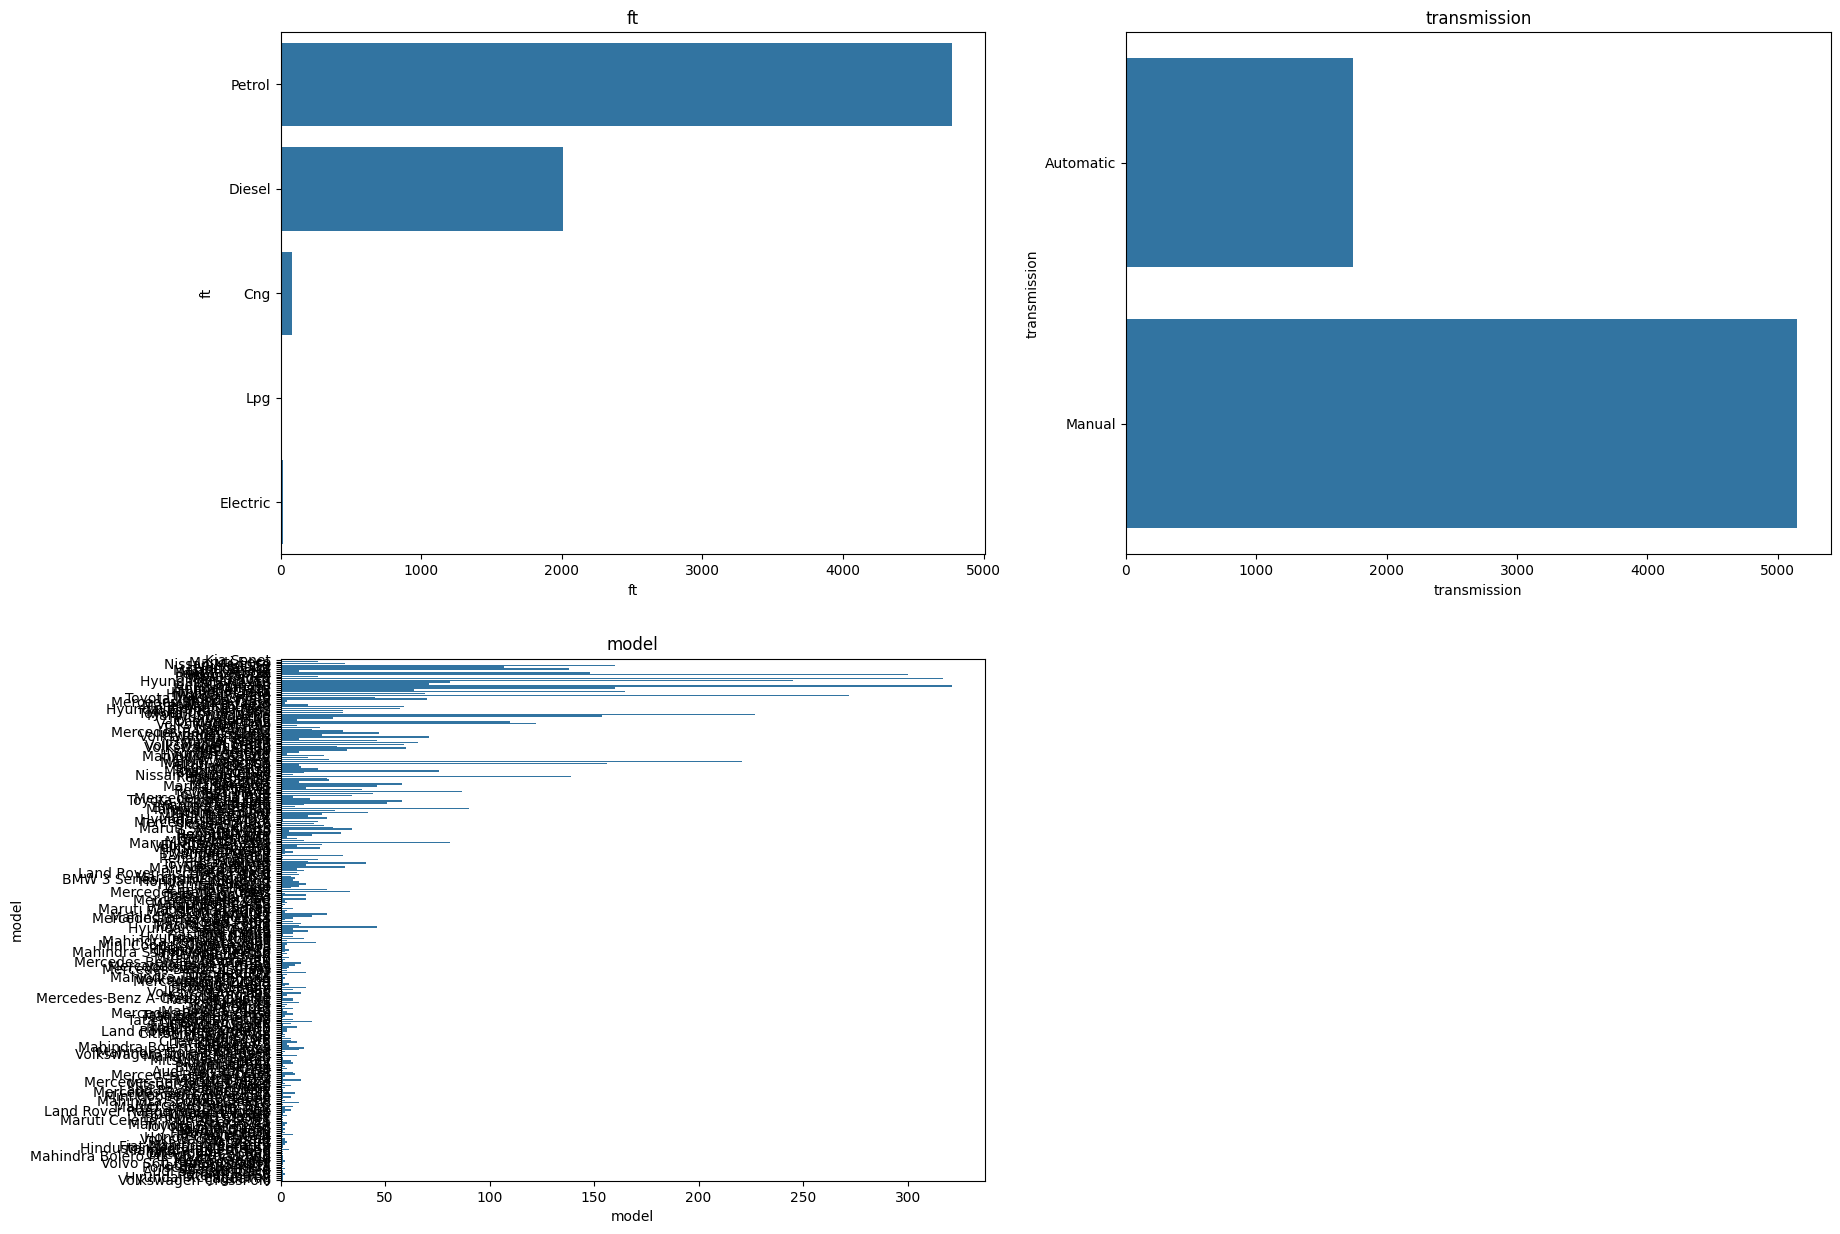

In [123]:
categorical=['ft', 'transmission', 'model']
plt.figure(figsize=(20,80))
plot=1
for i in categorical:
    ax=plt.subplot(10,2,plot)
    sns.countplot(y=i,data=df)
    plt.xlabel(i)
    plt.title(i)
    plot+=1
    plt.show

Bivariate Analysis(Relationship between Categorical features and Labels)


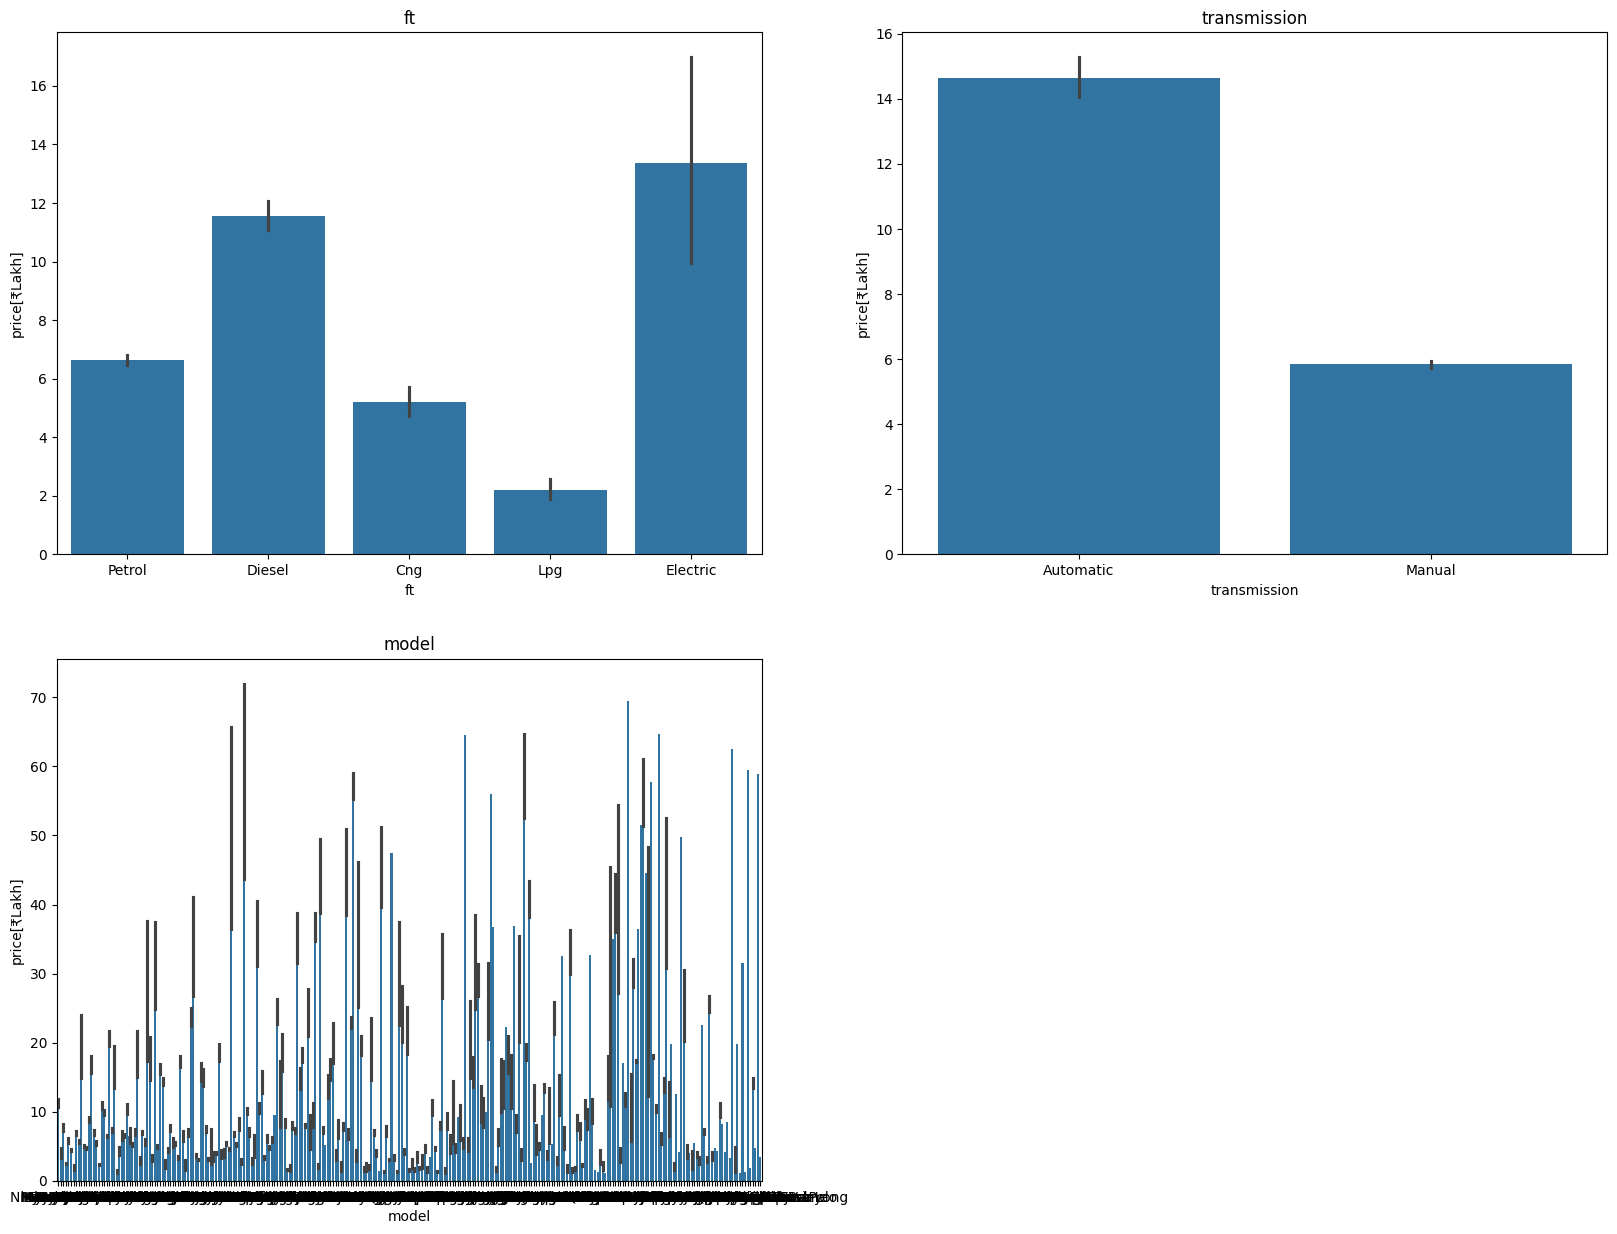

In [124]:
categorical=['ft', 'transmission', 'model']
plt.figure(figsize=(20,80))
plot=1
for i in categorical:
    ax=plt.subplot(10,2,plot)
    sns.barplot(x=i,y='price[₹Lakh]',data=df)
    plt.xlabel(i)
    plt.title(i)
    plot+=1
    plt.show

Explore Numerical Features

In [125]:
Numerical_features=[feature for feature in df.columns if ((df[feature].dtype!='object')&(feature not in ['rent']))]
Numerical_features

['km', 'ownerNo', 'modelYear', 'price[₹Lakh]']

Summary of Numerical Features

In [126]:
df.describe()

,km,ownerNo,modelYear,price[₹Lakh]
count,6.888000e+03,6888.000000,6888.000000,6888.000000
mean,5.781074e+04,1.340012,2016.615854,8.059052
std,4.527733e+04,0.613920,3.652177,8.150395
min,0.000000e+00,0.000000,1985.000000,1.050000
25%,3.076675e+04,1.000000,2014.000000,3.950000
50%,5.333200e+04,1.000000,2017.000000,5.860000
75%,7.857925e+04,2.000000,2019.000000,8.600000
max,2.000022e+06,5.000000,2023.000000,93.500000


Univariate Analysis(Distribution of Numerical Features)

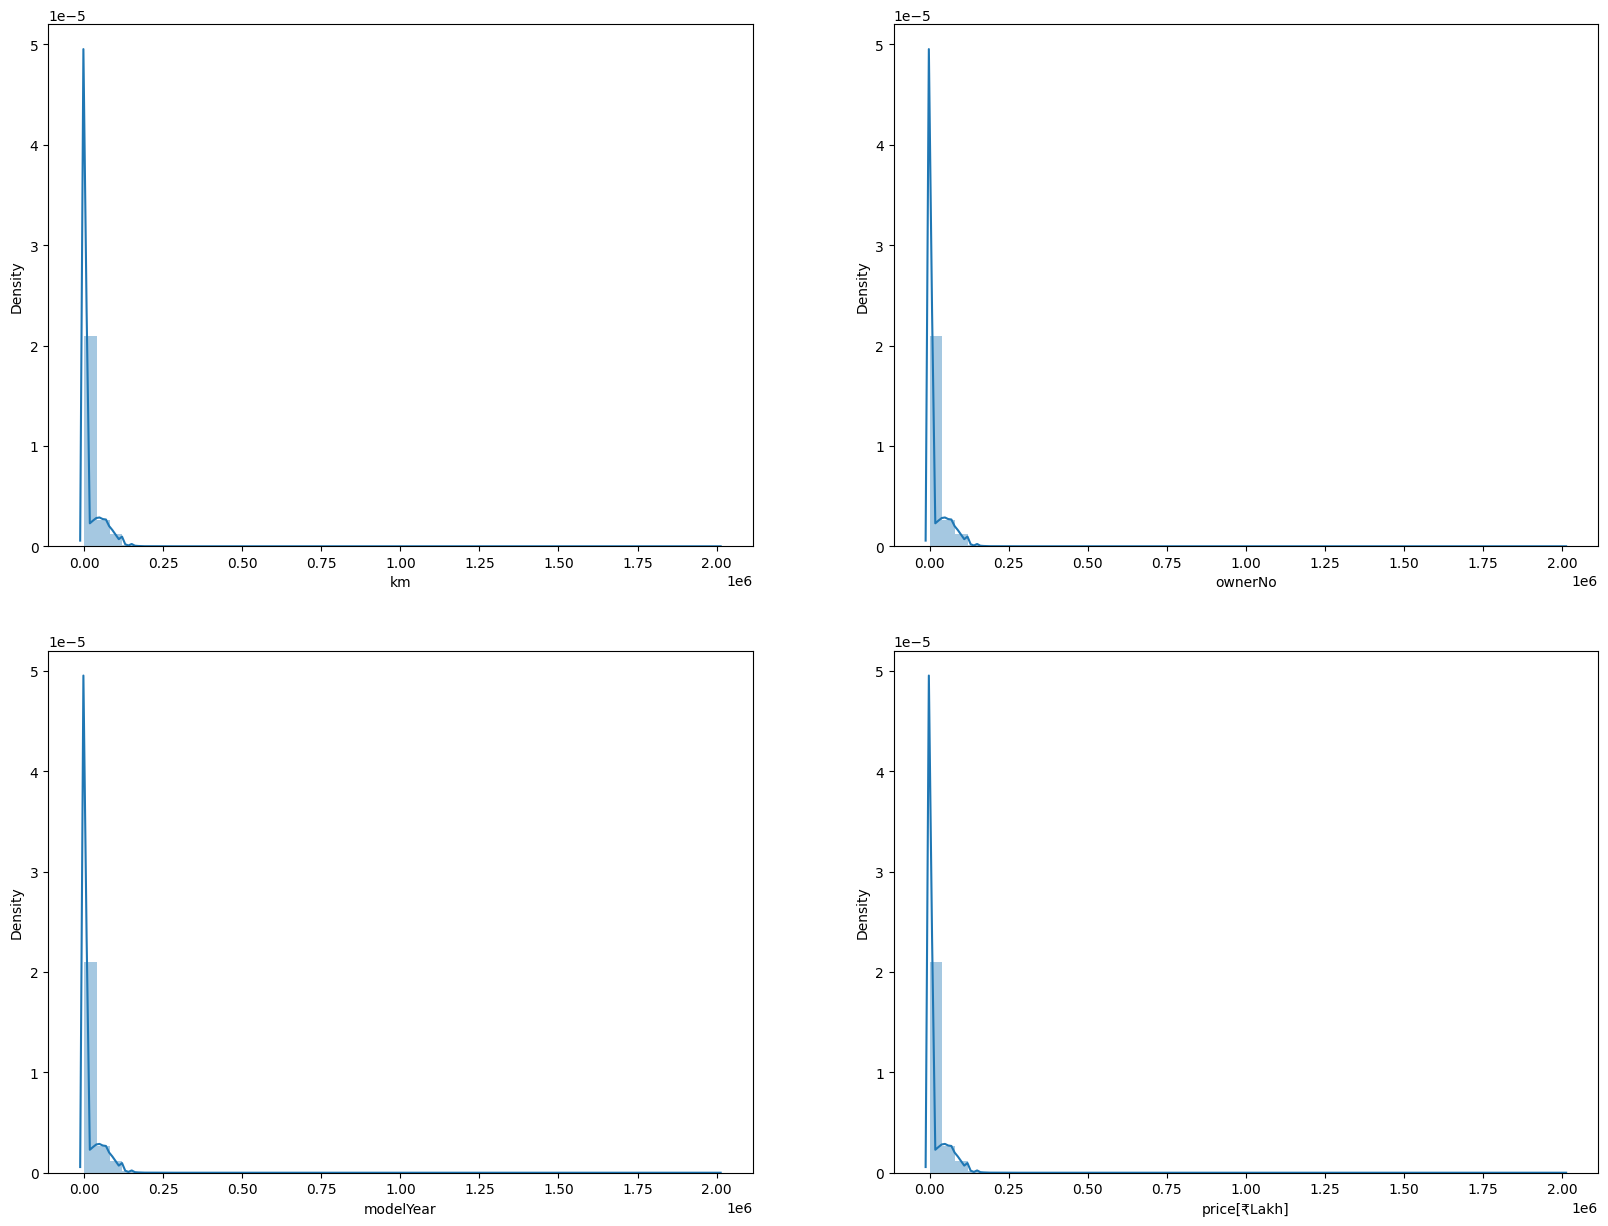

In [127]:
plt.figure(figsize=(20,80))
plot=1
for i in Numerical_features:
    ax=plt.subplot(10,2,plot)
    sns.distplot(df[Numerical_features])
    plt.xlabel(i)
    plot+=1
    plt.show


Bivariate Analysis(Relationship between Numerical Features and Labels)

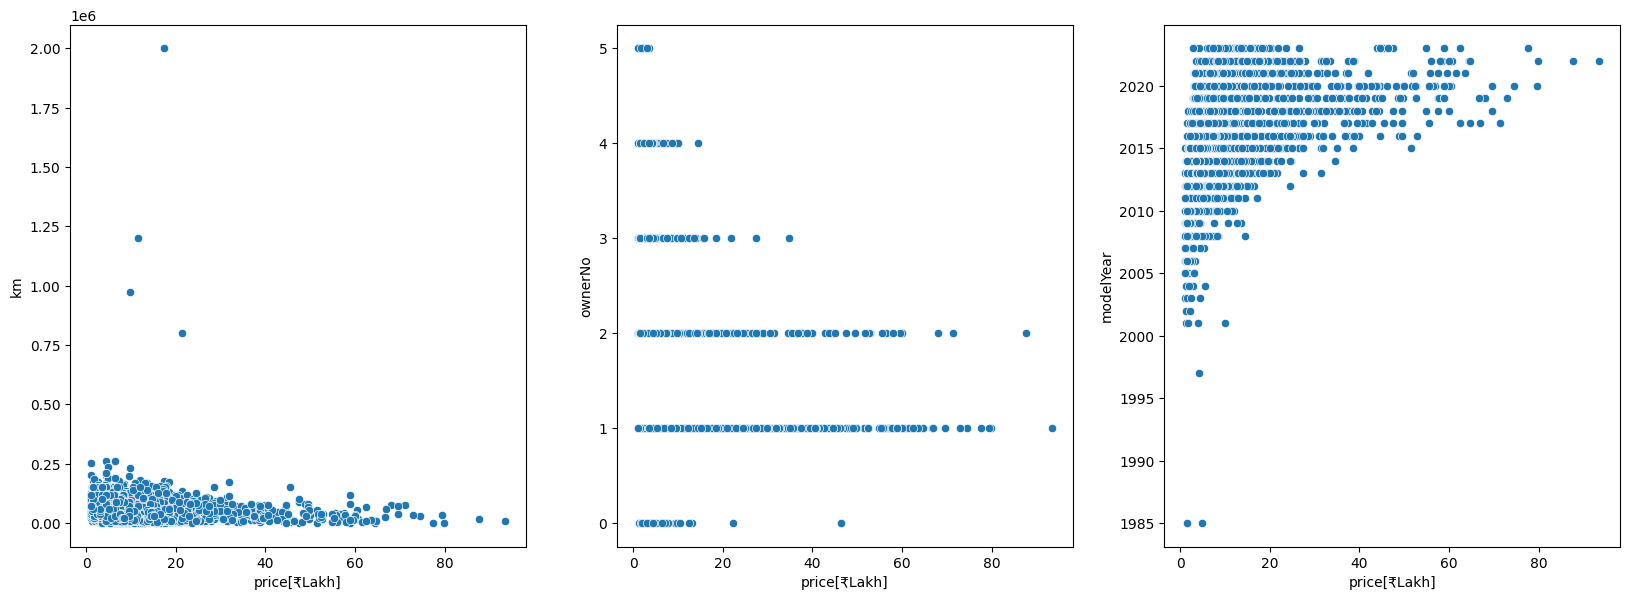

In [128]:
Continuous=['km', 'ownerNo', 'modelYear']
plt.figure(figsize=(20,80))
plot=1
for i in Continuous:
    ax=plt.subplot(10,3,plot)
    sns.scatterplot(x='price[₹Lakh]',y=i,data=df)
    plt.xlabel('price[₹Lakh]')
    plot+=1
    plt.show


Handling the Outliers through IQR method

<Axes: >

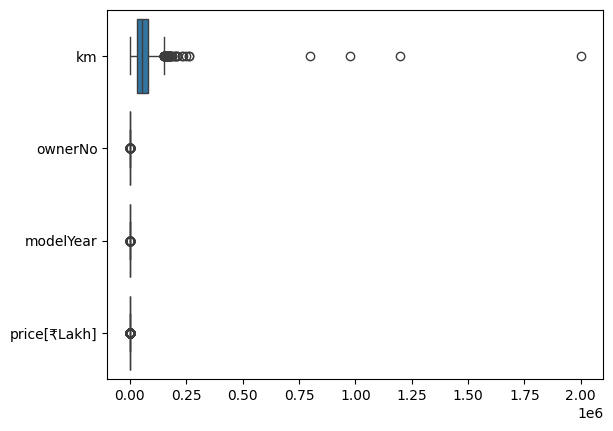

In [129]:
sns.boxplot(df,orient='h')

In [130]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [131]:
lr,ur=remove_outlier(df["km"])
df["km"]=np.where(df["km"]> ur,ur,df["km"])
df["km"]=np.where(df["km"]<lr,lr,df["km"])

<Axes: >

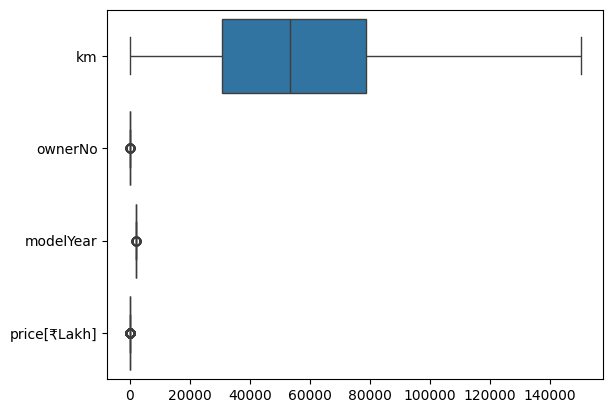

In [132]:
sns.boxplot(df,orient='h')

pairplot

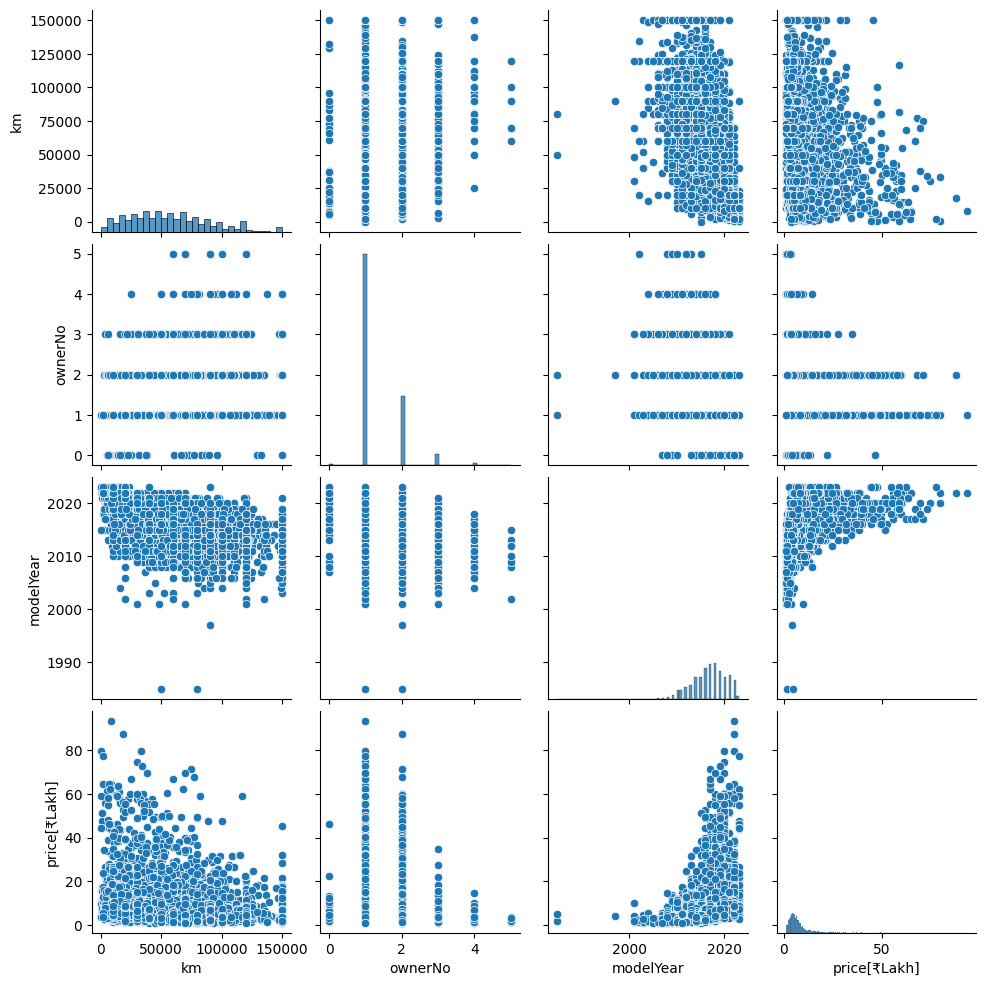

In [133]:
sns.pairplot(df)

Explore the Correlation between the Numerical Features

In [134]:
# Assuming df is your DataFrame
numerical_columns = df[['km', 'ownerNo', 'modelYear', 'price[₹Lakh]']]
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)


                    km   ownerNo  modelYear  price[₹Lakh]
km            1.000000  0.261431  -0.549077     -0.210337
ownerNo       0.261431  1.000000  -0.358468     -0.145145
modelYear    -0.549077 -0.358468   1.000000      0.358997
price[₹Lakh] -0.210337 -0.145145   0.358997      1.000000


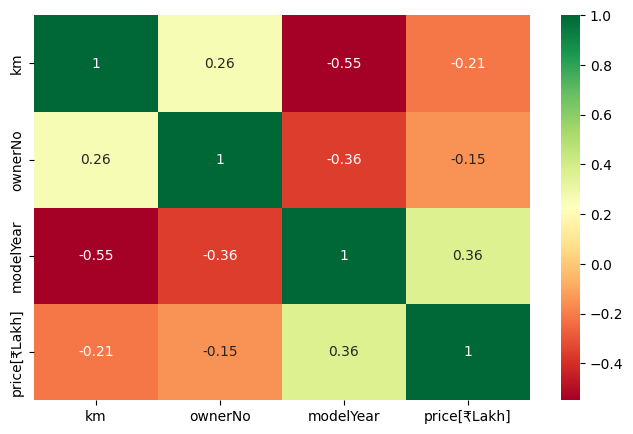

In [135]:
corrmat = correlation_matrix
top_corr_features = corrmat.index
plt.figure(figsize=(8,5))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [136]:
df1=df.copy()
df1

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,Petrol,20000.0,Automatic,1,Kia Sonet,2022,11.50
1,Petrol,20687.0,Manual,1,Maruti Eeco,2015,4.15
2,Petrol,30000.0,Manual,1,Nissan Magnite,2021,7.50
3,Petrol,59247.0,Manual,1,Hyundai i10,2015,3.98
4,Petrol,50000.0,Manual,1,Honda Jazz,2015,5.50
...,...,...,...,...,...,...,...
6883,Petrol,150000.0,Manual,1,Hyundai EON,2014,1.60
6884,Diesel,100000.0,Manual,1,Ford Ecosport,2014,3.50
6885,Petrol,120000.0,Manual,1,Chevrolet Beat,2011,1.08
6886,Petrol,70000.0,Manual,1,Maruti Alto,2007,1.05


In [137]:
df1["ft"].unique()

array(['Petrol', 'Diesel', 'Cng', 'Lpg', 'Electric'], dtype=object)

In [138]:
df1["ft"]=df1["ft"].map({"Petrol":0,"Diesel":1,"Cng":2,"Lpg":3,"Electric":4})

In [139]:
df1["transmission"].unique()

array(['Automatic', 'Manual'], dtype=object)

In [140]:
df1["transmission"]=df1["transmission"].map({"Automatic":0,"Manual":1})

In [141]:
df1

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,0,20000.0,0,1,Kia Sonet,2022,11.50
1,0,20687.0,1,1,Maruti Eeco,2015,4.15
2,0,30000.0,1,1,Nissan Magnite,2021,7.50
3,0,59247.0,1,1,Hyundai i10,2015,3.98
4,0,50000.0,1,1,Honda Jazz,2015,5.50
...,...,...,...,...,...,...,...
6883,0,150000.0,1,1,Hyundai EON,2014,1.60
6884,1,100000.0,1,1,Ford Ecosport,2014,3.50
6885,0,120000.0,1,1,Chevrolet Beat,2011,1.08
6886,0,70000.0,1,1,Maruti Alto,2007,1.05


In [142]:
model_stats=df1.groupby("model")["model"].count().sort_values(ascending=False)
print("Length of model_stats: ",len(model_stats))
print("Length of less than 10: ",len((model_stats[model_stats<=10])))
print("Length of greater than 10: ",len((model_stats[model_stats>10])))

Length of model_stats:  277
Length of less than 10:  173
Length of greater than 10:  104


In [143]:
model_lesser10=model_stats[model_stats<=10]
model_lesser10

model
MG Astor                   10
Nissan Terrano             10
Maruti Zen Estilo          10
Audi Q5                    10
Maruti Brezza              10
                           ..
Mahindra Jeep               1
Tata Yodha Pickup           1
Mercedes-Benz GLC Coupe     1
Renault Pulse               1
Jaguar XJ                   1
Name: model, Length: 173, dtype: int64

In [144]:
df1["model"]=df1["model"].apply(lambda x: 'other' if x in model_lesser10 else x)
len(df1["model"].unique())

105

In [145]:
df1

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh]
0,0,20000.0,0,1,Kia Sonet,2022,11.50
1,0,20687.0,1,1,Maruti Eeco,2015,4.15
2,0,30000.0,1,1,Nissan Magnite,2021,7.50
3,0,59247.0,1,1,Hyundai i10,2015,3.98
4,0,50000.0,1,1,Honda Jazz,2015,5.50
...,...,...,...,...,...,...,...
6883,0,150000.0,1,1,Hyundai EON,2014,1.60
6884,1,100000.0,1,1,Ford Ecosport,2014,3.50
6885,0,120000.0,1,1,Chevrolet Beat,2011,1.08
6886,0,70000.0,1,1,Maruti Alto,2007,1.05


In [146]:
df2=pd.get_dummies(df1["model"],drop_first=True)

In [147]:
df2

,Audi A4,Audi A6,Audi Q3,BMW 3 Series,BMW 5 Series,BMW X1,BMW X5,Chevrolet Beat,Chevrolet Cruze,Datsun GO,Datsun GO Plus,Datsun RediGO,Ford Aspire,Ford Ecosport,Ford Endeavour,Ford Figo,Honda Amaze,Honda Brio,Honda CR-V,Honda City,Honda Civic,Honda Jazz,Honda Mobilio,Honda WR-V,Hyundai Alcazar,Hyundai Aura,Hyundai Creta,Hyundai EON,Hyundai Elantra,Hyundai Grand i10,Hyundai Grand i10 Nios,Hyundai Santro,Hyundai Santro Xing,Hyundai Venue,Hyundai Verna,Hyundai Xcent,Hyundai i10,Hyundai i20,Hyundai i20 Active,Jeep Compass,Kia Carens,Kia Seltos,Kia Sonet,MG Hector,MG Hector Plus,Mahindra Bolero,Mahindra KUV 100,Mahindra KUV 100 NXT,Mahindra Scorpio,Mahindra TUV 300,Mahindra Thar,Mahindra XUV300,Mahindra XUV500,Maruti Alto,Maruti Alto 800,Maruti Alto K10,Maruti Baleno,Maruti Celerio,Maruti Celerio X,Maruti Ciaz,Maruti Eeco,Maruti Ertiga,Maruti Ignis,Maruti Ritz,Maruti S-Presso,Maruti SX4 S Cross,Maruti Swift,Maruti Swift Dzire,Maruti Vitara Brezza,Maruti Wagon R,Mercedes-Benz C-Class,Mercedes-Benz CLA,Mercedes-Benz E-Class,Mercedes-Benz GLC,Nissan Magnite,Nissan Micra,Renault Duster,Renault KWID,Renault Kiger,Renault Triber,Skoda Octavia,Skoda Rapid,Skoda Superb,Tata Altroz,Tata Harrier,Tata Manza,Tata New Safari,Tata Nexon,Tata Punch,Tata Tiago,Tata Tigor,Toyota Corolla Altis,Toyota Etios,Toyota Fortuner,Toyota Glanza,Toyota Innova,Toyota Innova Crysta,Toyota Urban cruiser,Toyota Yaris,Volkswagen Ameo,Volkswagen Polo,Volkswagen Taigun,Volkswagen Vento,other
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,Fal

In [148]:
df3=pd.concat([df1,df2],axis=1)
df3

,ft,km,transmission,ownerNo,model,modelYear,price[₹Lakh],Audi A4,Audi A6,Audi Q3,BMW 3 Series,BMW 5 Series,BMW X1,BMW X5,Chevrolet Beat,Chevrolet Cruze,Datsun GO,Datsun GO Plus,Datsun RediGO,Ford Aspire,Ford Ecosport,Ford Endeavour,Ford Figo,Honda Amaze,Honda Brio,Honda CR-V,Honda City,Honda Civic,Honda Jazz,Honda Mobilio,Honda WR-V,Hyundai Alcazar,Hyundai Aura,Hyundai Creta,Hyundai EON,Hyundai Elantra,Hyundai Grand i10,Hyundai Grand i10 Nios,Hyundai Santro,Hyundai Santro Xing,Hyundai Venue,Hyundai Verna,Hyundai Xcent,Hyundai i10,Hyundai i20,Hyundai i20 Active,Jeep Compass,Kia Carens,Kia Seltos,Kia Sonet,MG Hector,MG Hector Plus,Mahindra Bolero,Mahindra KUV 100,Mahindra KUV 100 NXT,Mahindra Scorpio,Mahindra TUV 300,Mahindra Thar,Mahindra XUV300,Mahindra XUV500,Maruti Alto,Maruti Alto 800,Maruti Alto K10,Maruti Baleno,Maruti Celerio,Maruti Celerio X,Maruti Ciaz,Maruti Eeco,Maruti Ertiga,Maruti Ignis,Maruti Ritz,Maruti S-Presso,Maruti SX4 S Cross,Maruti Swift,Maruti Swift Dzire,Maruti Vitara Brezza,Maruti Wagon R,Mercedes-Benz C-Class,Mercedes-Benz CLA,Mercedes-Benz E-Class,Mercedes-Benz GLC,Nissan Magnite,Nissan Micra,Renault Duster,Renault KWID,Renault Kiger,Renault Triber,Skoda Octavia,Skoda Rapid,Skoda Superb,Tata Altroz,Tata Harrier,Tata Manza,Tata New Safari,Tata Nexon,Tata Punch,Tata Tiago,Tata Tigor,Toyota Corolla Altis,Toyota Etios,Toyota Fortuner,Toyota Glanza,Toyota Innova,Toyota Innova Crysta,Toyota Urban cruiser,Toyota Yaris,Volkswagen Ameo,Volkswagen Polo,Volkswagen Taigun,Volkswagen Vento,other
0,0,20000.0,0,1,Kia Sonet,2022,11.50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,20687.0,1,1,Maruti Eeco,2015,4.15,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,30000.0,1,1,Nissan Magnite,2021,7.50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,59247.0,1,1,Hyundai i10,2015,3.98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [149]:
df3.drop("model",axis=1,inplace=True)

In [150]:
df3

,ft,km,transmission,ownerNo,modelYear,price[₹Lakh],Audi A4,Audi A6,Audi Q3,BMW 3 Series,BMW 5 Series,BMW X1,BMW X5,Chevrolet Beat,Chevrolet Cruze,Datsun GO,Datsun GO Plus,Datsun RediGO,Ford Aspire,Ford Ecosport,Ford Endeavour,Ford Figo,Honda Amaze,Honda Brio,Honda CR-V,Honda City,Honda Civic,Honda Jazz,Honda Mobilio,Honda WR-V,Hyundai Alcazar,Hyundai Aura,Hyundai Creta,Hyundai EON,Hyundai Elantra,Hyundai Grand i10,Hyundai Grand i10 Nios,Hyundai Santro,Hyundai Santro Xing,Hyundai Venue,Hyundai Verna,Hyundai Xcent,Hyundai i10,Hyundai i20,Hyundai i20 Active,Jeep Compass,Kia Carens,Kia Seltos,Kia Sonet,MG Hector,MG Hector Plus,Mahindra Bolero,Mahindra KUV 100,Mahindra KUV 100 NXT,Mahindra Scorpio,Mahindra TUV 300,Mahindra Thar,Mahindra XUV300,Mahindra XUV500,Maruti Alto,Maruti Alto 800,Maruti Alto K10,Maruti Baleno,Maruti Celerio,Maruti Celerio X,Maruti Ciaz,Maruti Eeco,Maruti Ertiga,Maruti Ignis,Maruti Ritz,Maruti S-Presso,Maruti SX4 S Cross,Maruti Swift,Maruti Swift Dzire,Maruti Vitara Brezza,Maruti Wagon R,Mercedes-Benz C-Class,Mercedes-Benz CLA,Mercedes-Benz E-Class,Mercedes-Benz GLC,Nissan Magnite,Nissan Micra,Renault Duster,Renault KWID,Renault Kiger,Renault Triber,Skoda Octavia,Skoda Rapid,Skoda Superb,Tata Altroz,Tata Harrier,Tata Manza,Tata New Safari,Tata Nexon,Tata Punch,Tata Tiago,Tata Tigor,Toyota Corolla Altis,Toyota Etios,Toyota Fortuner,Toyota Glanza,Toyota Innova,Toyota Innova Crysta,Toyota Urban cruiser,Toyota Yaris,Volkswagen Ameo,Volkswagen Polo,Volkswagen Taigun,Volkswagen Vento,other
0,0,20000.0,0,1,2022,11.50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,20687.0,1,1,2015,4.15,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,30000.0,1,1,2021,7.50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,59247.0,1,1,2015,3.98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [151]:
df3.to_csv(r"C:\Users\smm\Documents\cardekho\cardekho1.csv")

In [152]:
df=pd.read_csv(r"C:\Users\smm\Documents\cardekho\cardekho1.csv")

In [153]:
df

,Unnamed: 0,ft,km,transmission,ownerNo,modelYear,price[₹Lakh],Audi A4,Audi A6,Audi Q3,BMW 3 Series,BMW 5 Series,BMW X1,BMW X5,Chevrolet Beat,Chevrolet Cruze,Datsun GO,Datsun GO Plus,Datsun RediGO,Ford Aspire,Ford Ecosport,Ford Endeavour,Ford Figo,Honda Amaze,Honda Brio,Honda CR-V,Honda City,Honda Civic,Honda Jazz,Honda Mobilio,Honda WR-V,Hyundai Alcazar,Hyundai Aura,Hyundai Creta,Hyundai EON,Hyundai Elantra,Hyundai Grand i10,Hyundai Grand i10 Nios,Hyundai Santro,Hyundai Santro Xing,Hyundai Venue,Hyundai Verna,Hyundai Xcent,Hyundai i10,Hyundai i20,Hyundai i20 Active,Jeep Compass,Kia Carens,Kia Seltos,Kia Sonet,MG Hector,MG Hector Plus,Mahindra Bolero,Mahindra KUV 100,Mahindra KUV 100 NXT,Mahindra Scorpio,Mahindra TUV 300,Mahindra Thar,Mahindra XUV300,Mahindra XUV500,Maruti Alto,Maruti Alto 800,Maruti Alto K10,Maruti Baleno,Maruti Celerio,Maruti Celerio X,Maruti Ciaz,Maruti Eeco,Maruti Ertiga,Maruti Ignis,Maruti Ritz,Maruti S-Presso,Maruti SX4 S Cross,Maruti Swift,Maruti Swift Dzire,Maruti Vitara Brezza,Maruti Wagon R,Mercedes-Benz C-Class,Mercedes-Benz CLA,Mercedes-Benz E-Class,Mercedes-Benz GLC,Nissan Magnite,Nissan Micra,Renault Duster,Renault KWID,Renault Kiger,Renault Triber,Skoda Octavia,Skoda Rapid,Skoda Superb,Tata Altroz,Tata Harrier,Tata Manza,Tata New Safari,Tata Nexon,Tata Punch,Tata Tiago,Tata Tigor,Toyota Corolla Altis,Toyota Etios,Toyota Fortuner,Toyota Glanza,Toyota Innova,Toyota Innova Crysta,Toyota Urban cruiser,Toyota Yaris,Volkswagen Ameo,Volkswagen Polo,Volkswagen Taigun,Volkswagen Vento,other
0,0,0,20000.0,0,1,2022,11.50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,0,20687.0,1,1,2015,4.15,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,0,30000.0,1,1,2021,7.50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,0,59247.0,1,1,2015,3.98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [154]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [155]:
df

,ft,km,transmission,ownerNo,modelYear,price[₹Lakh],Audi A4,Audi A6,Audi Q3,BMW 3 Series,BMW 5 Series,BMW X1,BMW X5,Chevrolet Beat,Chevrolet Cruze,Datsun GO,Datsun GO Plus,Datsun RediGO,Ford Aspire,Ford Ecosport,Ford Endeavour,Ford Figo,Honda Amaze,Honda Brio,Honda CR-V,Honda City,Honda Civic,Honda Jazz,Honda Mobilio,Honda WR-V,Hyundai Alcazar,Hyundai Aura,Hyundai Creta,Hyundai EON,Hyundai Elantra,Hyundai Grand i10,Hyundai Grand i10 Nios,Hyundai Santro,Hyundai Santro Xing,Hyundai Venue,Hyundai Verna,Hyundai Xcent,Hyundai i10,Hyundai i20,Hyundai i20 Active,Jeep Compass,Kia Carens,Kia Seltos,Kia Sonet,MG Hector,MG Hector Plus,Mahindra Bolero,Mahindra KUV 100,Mahindra KUV 100 NXT,Mahindra Scorpio,Mahindra TUV 300,Mahindra Thar,Mahindra XUV300,Mahindra XUV500,Maruti Alto,Maruti Alto 800,Maruti Alto K10,Maruti Baleno,Maruti Celerio,Maruti Celerio X,Maruti Ciaz,Maruti Eeco,Maruti Ertiga,Maruti Ignis,Maruti Ritz,Maruti S-Presso,Maruti SX4 S Cross,Maruti Swift,Maruti Swift Dzire,Maruti Vitara Brezza,Maruti Wagon R,Mercedes-Benz C-Class,Mercedes-Benz CLA,Mercedes-Benz E-Class,Mercedes-Benz GLC,Nissan Magnite,Nissan Micra,Renault Duster,Renault KWID,Renault Kiger,Renault Triber,Skoda Octavia,Skoda Rapid,Skoda Superb,Tata Altroz,Tata Harrier,Tata Manza,Tata New Safari,Tata Nexon,Tata Punch,Tata Tiago,Tata Tigor,Toyota Corolla Altis,Toyota Etios,Toyota Fortuner,Toyota Glanza,Toyota Innova,Toyota Innova Crysta,Toyota Urban cruiser,Toyota Yaris,Volkswagen Ameo,Volkswagen Polo,Volkswagen Taigun,Volkswagen Vento,other
0,0,20000.0,0,1,2022,11.50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,20687.0,1,1,2015,4.15,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,30000.0,1,1,2021,7.50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,59247.0,1,1,2015,3.98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

Model Selection

In [156]:
df.shape

(6888, 110)

In [157]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.inspection import permutation_importance

In [159]:
X=df.drop("price[₹Lakh]",axis=1)
y=df["price[₹Lakh]"]

In [160]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [162]:
print(X.shape,X_train.shape,X_test.shape)

(6888, 109) (5510, 109) (1378, 109)


In [163]:
model_params={
    'linear':{
        'model':LinearRegression(),
        'params': {
                'fit_intercept': [True, False]
        }
    },
    
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth':[5,7,10],
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
        }
    },
    'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
    },
      'random_forest':{
         'model':RandomForestRegressor(),
         'params':{
             'criterion':['squared_error','friedman_mse'],
             'n_estimators':[1,5,10]
             
}
         },
    'k_neighbor':{
         'model':KNeighborsRegressor(),
         'params':{
             'n_neighbors':[5,10],
             'weights':['uniform','distance'],
             'metric':['minkowski']
             
             
}
         },
    
          
'ridge':{
         'model':Ridge(),
         'params':{
             'alpha':[1,12],
             'solver':['auto','lbfgs']
             
             
             
}
         },
    
          
'svr':{
         'model':SVR(),
         'params':{
             'kernel':['linear','rbf'],
             'C':[1,10,20]
             
             
             
}
         },
    
'xgb':{
         'model':XGBRegressor(),
         'params':{
             'n_estimators':[1,5,10],
             'max_depth':[5,7,10]
             
             
}
         },
'gb':{
         'model':GradientBoostingRegressor(),
         'params':{
             'n_estimators':[1,5,10],
             'criterion':['squared_error','friedman_mse'],
             'learning_rate':[0.1,0.2,0.3]
             
             
}
         }
    
          }
             

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a scorer (e.g., mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# RandomForestRegressor model and parameters
model = RandomForestRegressor()
params = {
    'criterion': ['squared_error', 'friedman_mse'],
    'n_estimators': [1, 5, 10]
}

# Create GridSearchCV
grid_search = GridSearchCV(model, params, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the results
print(f"\nResults for RandomForestRegressor:")
print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, grid_search.predict(X_test))}")

# Get the best model
best_rf_model = grid_search.best_estimator_



Results for RandomForestRegressor:
Best Params: {'criterion': 'friedman_mse', 'n_estimators': 10}
Best Score: -19.539156840938098
Mean Squared Error on Test Set: 15.505342929538736


In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a scorer (e.g., mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# LinearRegression model and parameters
model = LinearRegression()
params = {
    'fit_intercept': [True, False]
}

# Create GridSearchCV
grid_search = GridSearchCV(model, params, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the results
print(f"\nResults for Linear Regression:")
print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, grid_search.predict(X_test))}")

# Get the best model
best_linear_model = grid_search.best_estimator_



Results for Linear Regression:
Best Params: {'fit_intercept': True}
Best Score: -26.727335297653518
Mean Squared Error on Test Set: 18.428783402069683


In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a scorer (e.g., mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# DecisionTreeRegressor model and parameters
model = DecisionTreeRegressor()
params = {
    'max_depth': [5, 7, 10],
    'criterion': ['squared_error', 'friedman_mse'],
    'splitter': ['best', 'random']
}

# Create GridSearchCV
grid_search = GridSearchCV(model, params, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the results
print(f"\nResults for Decision Tree:")
print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, grid_search.predict(X_test))}")

# Get the best model
best_decision_tree_model = grid_search.best_estimator_



Results for Decision Tree:
Best Params: {'criterion': 'squared_error', 'max_depth': 10, 'splitter': 'random'}
Best Score: -24.031622260679846
Mean Squared Error on Test Set: 28.18881475558428


In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a scorer (e.g., mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Lasso model and parameters
model = Lasso()
params = {
    'alpha': [1, 2],
    'selection': ['random', 'cyclic']
}

# Create GridSearchCV
grid_search = GridSearchCV(model, params, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the results
print(f"\nResults for Lasso Regression:")
print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, grid_search.predict(X_test))}")

# Get the best model
best_lasso_model = grid_search.best_estimator_



Results for Lasso Regression:
Best Params: {'alpha': 1, 'selection': 'cyclic'}
Best Score: -53.5037451371766
Mean Squared Error on Test Set: 40.31185044296139


In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a scorer (e.g., mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# KNeighborsRegressor model and parameters
model = KNeighborsRegressor()
params = {
    'n_neighbors': [5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski']
}

# Create GridSearchCV
grid_search = GridSearchCV(model, params, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the results
print(f"\nResults for K-Neighbors Regressor:")
print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, grid_search.predict(X_test))}")

# Get the best model
best_k_neighbors_model = grid_search.best_estimator_



Results for K-Neighbors Regressor:
Best Params: {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
Best Score: -63.1597765785844
Mean Squared Error on Test Set: 48.60056208055152


In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a scorer (e.g., mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Ridge model and parameters
model = Ridge()
params = {
    'alpha': [1, 12],
    'solver': ['auto', 'lbfgs']
}

# Create GridSearchCV
grid_search = GridSearchCV(model, params, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the results
print(f"\nResults for Ridge Regression:")
print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, grid_search.predict(X_test))}")

# Get the best model
best_ridge_model = grid_search.best_estimator_



Results for Ridge Regression:
Best Params: {'alpha': 1, 'solver': 'auto'}
Best Score: -26.99775754954846
Mean Squared Error on Test Set: 18.644046125216075


In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a scorer (e.g., mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# GradientBoostingRegressor model and parameters
model = GradientBoostingRegressor()
params = {
    'n_estimators': [1, 5, 10],
    'criterion': ['squared_error', 'friedman_mse'],
    'learning_rate': [0.1, 0.2, 0.3]
}

# Create GridSearchCV
grid_search = GridSearchCV(model, params, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the results
print(f"\nResults for Gradient Boosting Regressor:")
print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, grid_search.predict(X_test))}")

# Get the best model
best_gb_model = grid_search.best_estimator_



Results for Gradient Boosting Regressor:
Best Params: {'criterion': 'squared_error', 'learning_rate': 0.3, 'n_estimators': 10}
Best Score: -25.25635069119102
Mean Squared Error on Test Set: 20.203631420472288


In [175]:
import pandas as pd

# Results for different models
results_data = {
    'Model': ['RandomForestRegressor', 'Linear Regression', 'Decision Tree', 'Lasso Regression', 'K-Neighbors Regressor', 'Ridge Regression', 'Gradient Boosting Regressor'],
    'Best Params': [
        {'criterion': 'friedman_mse', 'n_estimators': 10},
        {'fit_intercept': True},
        {'criterion': 'squared_error', 'max_depth': 10, 'splitter': 'random'},
        {'alpha': 1, 'selection': 'cyclic'},
        {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'},
        {'alpha': 1, 'solver': 'auto'},
        {'criterion': 'squared_error', 'learning_rate': 0.3, 'n_estimators': 10}
    ],
    'Best Score': [abs(score) for score in [-19.539156840938098, -26.727335297653518, -24.031622260679846, -53.5037451371766, -63.1597765785844, -26.99775754954846, -25.25635069119102]],
    'Mean Squared Error on Test Set': [15.505342929538736, 18.428783402069683, 28.18881475558428, 40.31185044296139, 48.60056208055152, 18.644046125216075, 20.203631420472288]
}

# Create DataFrame
results_df = pd.DataFrame(results_data)

# Print DataFrame
print(results_df)


                         Model  \
0        RandomForestRegressor   
1            Linear Regression   
2                Decision Tree   
3             Lasso Regression   
4        K-Neighbors Regressor   
5             Ridge Regression   
6  Gradient Boosting Regressor   

                                         Best Params  Best Score  \
0  {'criterion': 'friedman_mse', 'n_estimators': 10}   19.539157   
1                            {'fit_intercept': True}   26.727335   
2  {'criterion': 'squared_error', 'max_depth': 10...   24.031622   
3                {'alpha': 1, 'selection': 'cyclic'}   53.503745   
4  {'metric': 'minkowski', 'n_neighbors': 10, 'we...   63.159777   
5                     {'alpha': 1, 'solver': 'auto'}   26.997758   
6  {'criterion': 'squared_error', 'learning_rate'...   25.256351   

   Mean Squared Error on Test Set  
0                       15.505343  
1                       18.428783  
2                       28.188815  
3                       40.311850  
4 

In [177]:
import pandas as pd

# Provided data
data = {
    'Model': ['RandomForestRegressor', 'Linear Regression', 'Decision Tree', 'Lasso Regression', 'K-Neighbors Regressor', 'Ridge Regression', 'Gradient Boosting Regressor'],
    'Best Params': [
        {'criterion': 'friedman_mse', 'n_estimators': 10},
        {'fit_intercept': True},
        {'criterion': 'squared_error', 'max_depth': 10, 'splitter': 'random'},
        {'alpha': 1, 'selection': 'cyclic'},
        {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'},
        {'alpha': 1, 'solver': 'auto'},
        {'criterion': 'squared_error', 'learning_rate': 0.3, 'n_estimators': 10}
    ],
    'Best Score': [abs(score) for score in [-19.539156840938098, -26.727335297653518, -24.031622260679846, -53.5037451371766, -63.1597765785844, -26.99775754954846, -25.25635069119102]],
    'Mean Squared Error on Test Set': [15.505342929538736, 18.428783402069683, 28.18881475558428, 40.31185044296139, 48.60056208055152, 18.644046125216075, 20.203631420472288]
}

# Create DataFrame
df_sc = pd.DataFrame(data)

# Sort the DataFrame by 'Best Score' in descending order
df_sc = df_sc.sort_values(["Best Score"], ascending=False)

# Print the DataFrame in table format
print(df_sc.to_markdown(index=False))


| Model                       | Best Params                                                              |   Best Score |   Mean Squared Error on Test Set |
|:----------------------------|:-------------------------------------------------------------------------|-------------:|---------------------------------:|
| K-Neighbors Regressor       | {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}         |      63.1598 |                          48.6006 |
| Lasso Regression            | {'alpha': 1, 'selection': 'cyclic'}                                      |      53.5037 |                          40.3119 |
| Ridge Regression            | {'alpha': 1, 'solver': 'auto'}                                           |      26.9978 |                          18.644  |
| Linear Regression           | {'fit_intercept': True}                                                  |      26.7273 |                          18.4288 |
| Gradient Boosting Regressor | {'criterion': 'squared_err

In [178]:
model=RandomForestRegressor(criterion='friedman_mse',n_estimators= 10)


In [179]:
model.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', n_estimators=10)

In [180]:
model.score(X_train,y_train)

0.9473307465527043

In [181]:
model.score(X_test,y_test)

0.7441530115977997

Cross Validation

In [182]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.69807398, 0.76458511, 0.68829731, 0.75330152, 0.7146897 ])

In [183]:
scores = cross_val_score(model, X_test, y_test, cv=5)
scores

array([0.75549462, 0.61494242, 0.75864109, 0.53574211, 0.41912683])

Feature Importance

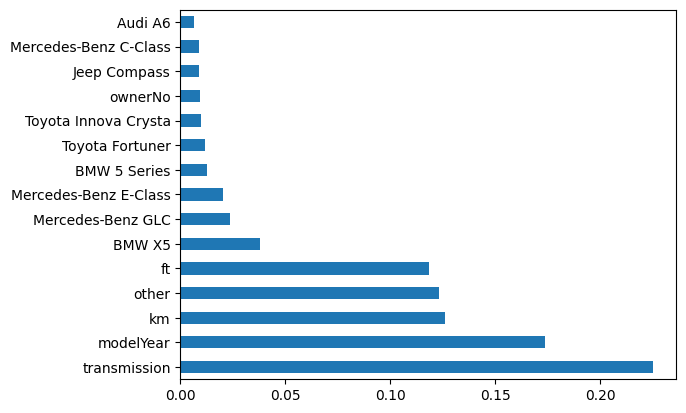

In [184]:
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

Metric Evaluation

In [185]:
x_pred=model.predict(X_train)
print("Train_MSE: ",metrics.mean_squared_error(y_train,x_pred))
print("Train_MAE: ",metrics.mean_absolute_error(y_train,x_pred))
print("Train_R2_Score: ",metrics.r2_score(y_train,x_pred))

Train_MSE:  3.653867010994676
Train_MAE:  0.7069790108892922
Train_R2_Score:  0.9473307465527043


In [186]:
y_pred=model.predict(X_test)
print("Test_MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("Test_MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("Test_R2_Score: ",metrics.r2_score(y_test,y_pred))

Test_MSE:  13.969739549829535
Test_MAE:  1.6257594477849193
Test_R2_Score:  0.7441530115977997


Predict the Price

In [187]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)
result

,ft,km,transmission,ownerNo,modelYear,price[₹Lakh],Audi A4,Audi A6,Audi Q3,BMW 3 Series,BMW 5 Series,BMW X1,BMW X5,Chevrolet Beat,Chevrolet Cruze,Datsun GO,Datsun GO Plus,Datsun RediGO,Ford Aspire,Ford Ecosport,Ford Endeavour,Ford Figo,Honda Amaze,Honda Brio,Honda CR-V,Honda City,Honda Civic,Honda Jazz,Honda Mobilio,Honda WR-V,Hyundai Alcazar,Hyundai Aura,Hyundai Creta,Hyundai EON,Hyundai Elantra,Hyundai Grand i10,Hyundai Grand i10 Nios,Hyundai Santro,Hyundai Santro Xing,Hyundai Venue,Hyundai Verna,Hyundai Xcent,Hyundai i10,Hyundai i20,Hyundai i20 Active,Jeep Compass,Kia Carens,Kia Seltos,Kia Sonet,MG Hector,MG Hector Plus,Mahindra Bolero,Mahindra KUV 100,Mahindra KUV 100 NXT,Mahindra Scorpio,Mahindra TUV 300,Mahindra Thar,Mahindra XUV300,Mahindra XUV500,Maruti Alto,Maruti Alto 800,Maruti Alto K10,Maruti Baleno,Maruti Celerio,Maruti Celerio X,Maruti Ciaz,Maruti Eeco,Maruti Ertiga,Maruti Ignis,Maruti Ritz,Maruti S-Presso,Maruti SX4 S Cross,Maruti Swift,Maruti Swift Dzire,Maruti Vitara Brezza,Maruti Wagon R,Mercedes-Benz C-Class,Mercedes-Benz CLA,Mercedes-Benz E-Class,Mercedes-Benz GLC,Nissan Magnite,Nissan Micra,Renault Duster,Renault KWID,Renault Kiger,Renault Triber,Skoda Octavia,Skoda Rapid,Skoda Superb,Tata Altroz,Tata Harrier,Tata Manza,Tata New Safari,Tata Nexon,Tata Punch,Tata Tiago,Tata Tigor,Toyota Corolla Altis,Toyota Etios,Toyota Fortuner,Toyota Glanza,Toyota Innova,Toyota Innova Crysta,Toyota Urban cruiser,Toyota Yaris,Volkswagen Ameo,Volkswagen Polo,Volkswagen Taigun,Volkswagen Vento,other,Price_actual,Price_pred
8,0,20000.0,1,1,2021,8.65,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8.65,9.579
14,1,65000.0,1,1,2017,12.25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,12.25,9.880
15,0,93281.0,1,1,2014,5.70,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5.70,5.650
17,0,30000.0,1,1,2016,2.75,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [188]:
result[['ft', 'km', 'transmission', 'ownerNo', 'modelYear','Price_actual', 'Price_pred']].sample(20)

,ft,km,transmission,ownerNo,modelYear,Price_actual,Price_pred
4552,0,73944.0,1,1,2015,2.66,2.473000
3274,0,47688.0,1,1,2017,4.50,6.283000
3154,0,41352.0,0,1,2011,3.30,4.010000
216,1,105000.0,1,1,2018,20.50,19.751000
3402,2,23900.0,1,1,2021,5.41,4.944000
3473,0,50000.0,1,1,2021,7.20,7.237000
2543,0,57806.0,1,2,2017,2.95,3.025000
1817,1,100000.0,1,1,2014,5.35,3.151000
3742,0,68556.0,1,1,2020,4.32,4.088000
3196,2,60000.0,1,2,2014,2.05,3.019000


Save the model

In [189]:
import pickle
with open(r"C:\Users\smm\Documents\cardekho\model.pkl", 'wb') as file:
    pickle.dump(model, file)

Load the model and predict the result

In [190]:
import pickle
with open(r"C:\Users\smm\Documents\cardekho\model.pkl", 'rb') as file:
    plr= pickle.load(file)

In [191]:
def predict_price(model,ft,km,transmission,ownerNo,modelYear):
    loc_index=np.where(X.columns==model)[0][0]
    x=np.zeros(len(X.columns))     
    x[0]=ft
    x[1]=km
    x[2]=transmission
    x[3]=ownerNo
    x[4]=modelYear
    if loc_index>=0:
        x[loc_index]=1
    return x
    

In [192]:
x=predict_price('Maruti Ertiga',1,50000.0,1,1,2017)
result=plr.predict([x])[0]
print( f'The estimated price of the car is {result} Lakh Rupees')

The estimated price of the car is 8.006 Lakh Rupees


Actual Car Price is 11.50 Lakh Rupees and Model predict the Price is approximately Rs.10.83 Lakh Rupees.